In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
train_df = pd.read_csv("./annotated_data/data_splits/ct_neuro_train_merged_713.csv")
dev_df = pd.read_csv("./annotated_data/data_splits/ct_neuro_dev_merged_90.csv")
test_df = pd.read_csv("./annotated_data/data_splits/ct_neuro_test_merged_90.csv")
all_annotations = pd.concat([train_df, dev_df, test_df], ignore_index=True)

all_annotations

,tokens,ner_tags,id,nct_id,text,ner_manual_ct_target
0,"['Drug', 'Eluting', 'Stenting', 'and', 'Aggres...","['B-OTHER', 'I-OTHER', 'I-OTHER', 'O', 'B-OTHE...",NCT04948749,NCT04948749,Drug Eluting Stenting and Aggressive Medical T...,"[(0, 21, 'OTHER', 'Drug Eluting Stenting'), (2..."
1,"['An', 'Ascending', 'Multiple', 'Dose', 'Study...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",NCT00480818,NCT00480818,An Ascending Multiple Dose Study of the Safety...,"[(100, 107, 'DRUG', 'SAM-531'), (242, 249, 'DR..."
2,"['Xuanwu', 'Hospital', 'Capital', 'Medical', '...","['O', 'O', 'O', 'O', 'O', 'O', 'B-COND', 'I-CO...",NCT03622515,NCT03622515,Xuanwu Hospital Capital Medical University | F...,"[(45, 58, 'CONDITION', 'Fragile brain'), (121,..."
3,"['Intravenous', 'Exenatide', 'Infusion', 'in',...","['O', 'B-DRUG', 'O', 'O', 'B-COND', 'I-COND', ...",NCT02058940,NCT02058940,Intravenous Exenatide Infusion in Critically I...,"[(12, 21, 'DRUG', 'Exenatide'), (34, 48, 'COND..."
4,"['A', 'Randomized', 'Controlled', 'Trial', 'Ut...","['O', 'O', 'O', 'O', 'O', 'O', 'B-OTHER', 'O',...",NCT04154579,NCT04154579,A Randomized Controlled Trial Utilizing the Ar...,"[(44, 48, 'OTHER', 'Arts'), (312, 328, 'CONTRO..."
...,...,...,...,...,...,...
888,"['Treatment', 'of', 'Periodontitis', 'to', 'Pr...","['B-OTHER', 'I-OTHER', 'I-OTHER', 'O', 'O', 'B...",NCT03755362,NCT03755362,Treatment of Periodontitis to Prevent Dementia...,"[(0, 26, 'OTHER', 'Treatment of Periodontitis'..."
889,"['A', '48', '-', 'Week', ',', 'Multicenter', '...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",NCT00506415,NCT00506415,"A 48-Week, Multicenter, Randomized, Double-Bli...","[(133, 139, 'DRUG', 'Exelon'), (179, 215, 'CON..."
890,"['Multicenter', ',', 'Open', '-', 'label', 'St...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",NCT01344447,NCT01344447,"Multicenter, Open-label Study to Evaluate the ...","[(244, 288, 'CONDITION', 'Vascular Disease of ..."
891,"['Effects', 'of', 'Attention', 'Training', 'In...","['O', 'O', 'B-BEH', 'I-BEH', 'I-BEH', 'O', 'B-...",NCT04184206,NCT04184206,Effects of Attention Training Interventions on...,"[(11, 43, 'BEHAVIOURAL', 'Attention Training I..."


In [3]:
len(train_df), len(test_df)

(713, 90)

In [4]:
all_annotations['token_count'] = all_annotations['tokens'].apply(lambda x: len(eval(x)))
avg_tokens = all_annotations['token_count'].mean()
std_dev_tokens = all_annotations['token_count'].std()
min_tokens = all_annotations['token_count'].min()
max_tokens = all_annotations['token_count'].max()

print(f"Average number of tokens per row: {avg_tokens}")
print(f"Standard deviation of tokens per row: {std_dev_tokens}")
print("min: ", min_tokens)
print("max: ", max_tokens)


Average number of tokens per row: 134.8073908174692
Standard deviation of tokens per row: 107.58937712839086
min:  17
max:  829


In [5]:
import ast

# Assuming 'all_annotations' is your DataFrame
all_annotations['tokens'] = all_annotations['tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Concatenate all token lists across rows
all_tokens = [token for token_list in all_annotations['tokens'] for token in token_list]

# Calculate the number of unique tokens
unique_tokens = len(set(all_tokens))

In [6]:
len(all_tokens)

120383

In [7]:
unique_tokens

11549

In [8]:
all_annotations

,tokens,ner_tags,id,nct_id,text,ner_manual_ct_target,token_count
0,"[Drug, Eluting, Stenting, and, Aggressive, Med...","['B-OTHER', 'I-OTHER', 'I-OTHER', 'O', 'B-OTHE...",NCT04948749,NCT04948749,Drug Eluting Stenting and Aggressive Medical T...,"[(0, 21, 'OTHER', 'Drug Eluting Stenting'), (2...",83
1,"[An, Ascending, Multiple, Dose, Study, of, the...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",NCT00480818,NCT00480818,An Ascending Multiple Dose Study of the Safety...,"[(100, 107, 'DRUG', 'SAM-531'), (242, 249, 'DR...",83
2,"[Xuanwu, Hospital, Capital, Medical, Universit...","['O', 'O', 'O', 'O', 'O', 'O', 'B-COND', 'I-CO...",NCT03622515,NCT03622515,Xuanwu Hospital Capital Medical University | F...,"[(45, 58, 'CONDITION', 'Fragile brain'), (121,...",142
3,"[Intravenous, Exenatide, Infusion, in, Critica...","['O', 'B-DRUG', 'O', 'O', 'B-COND', 'I-COND', ...",NCT02058940,NCT02058940,Intravenous Exenatide Infusion in Critically I...,"[(12, 21, 'DRUG', 'Exenatide'), (34, 48, 'COND...",37
4,"[A, Randomized, Controlled, Trial, Utilizing, ...","['O', 'O', 'O', 'O', 'O', 'O', 'B-OTHER', 'O',...",NCT04154579,NCT04154579,A Randomized Controlled Trial Utilizing the Ar...,"[(44, 48, 'OTHER', 'Arts'), (312, 328, 'CONTRO...",143
...,...,...,...,...,...,...,...
888,"[Treatment, of, Periodontitis, to, Prevent, De...","['B-OTHER', 'I-OTHER', 'I-OTHER', 'O', 'O', 'B...",NCT03755362,NCT03755362,Treatment of Periodontitis to Prevent Dementia...,"[(0, 26, 'OTHER', 'Treatment of Periodontitis'...",159
889,"[A, 48, -, Week, ,, Multicenter, ,, Randomized...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",NCT00506415,NCT00506415,"A 48-Week, Multicenter, Randomized, Double-Bli...","[(133, 139, 'DRUG', 'Exelon'), (179, 215, 'CON...",93
890,"[Multicenter, ,, Open, -, label, Study, to, Ev...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",NCT01344447,NCT01344447,"Multicenter, Open-label Study to Evaluate the ...","[(244, 288, 'CONDITION', 'Vascular Disease of ...",188
891,"[Effects, of, Attention, Training, Interventio...","['O', 'O', 'B-BEH', 'I-BEH', 'I-BEH', 'O', 'B-...",NCT04184206,NCT04184206,Effects of Attention Training Interventions on...,"[(11, 43, 'BEHAVIOURAL', 'Attention Training I...",32


## Entities Frequencies and Overlaps Stats

In [9]:
dev_entities = pd.read_csv("./annotated_data/corpus_stats/clintrials_dev_entities_stats.csv")
train_entities = pd.read_csv("./annotated_data/corpus_stats/clintrials_train_entities_stats.csv")
test_entities = pd.read_csv("./annotated_data/corpus_stats/clintrials_test_entities_stats.csv")


In [10]:
sum(train_entities['frequency']), sum(dev_entities['frequency']), sum(test_entities['frequency'])


(6466, 770, 902)

In [11]:
train_entities

,entity_token,frequency,entity_class
0,placebo,163,CONTROL
1,stroke,111,CONDITION
2,parkinson's disease,83,CONDITION
3,pd,79,CONDITION
4,schizophrenia,68,CONDITION
...,...,...,...
2800,active transcutaneous auricular vagus nerve st...,1,OTHER
2801,inflammation,1,CONDITION
2802,spm 936,1,DRUG
2803,idiopathic restless legs syndrome.,1,CONDITION


In [12]:
def get_top(df, n=5, entity_class=None):
    if entity_class:
        # Filter the dataframe based on the specified entity_class
        filtered_df = df[df['entity_class'] == entity_class]
    else:
        # If entity_class is not specified, use the entire dataframe
        filtered_df = df

    # Sort the filtered dataframe by frequency in descending order
    sorted_df = filtered_df.sort_values(by=['frequency'], ascending=[False])

    # Get the top 5 entity_token based on frequency
    top_5_tokens = sorted_df.head(n)

    return top_5_tokens

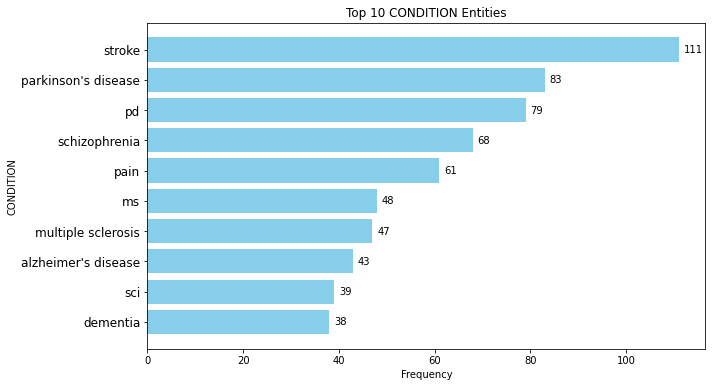

In [13]:
df_all = pd.concat([dev_entities, train_entities, test_entities], ignore_index=True)
# Get the top 10 CONDITION entities
top10_condition = get_top(df_all, n=10, entity_class="CONDITION")

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top10_condition['entity_token'], top10_condition['frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('CONDITION')
plt.title('Top 10 CONDITION Entities')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest frequency at the top

# Add annotations to each bar
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, f'{width}', va='center')
plt.yticks(fontsize=12)

plt.show()

In [14]:
entity_class_frq = df_all.groupby('entity_class')['frequency'].sum().reset_index()
entity_class_frq

,entity_class,frequency
0,BEHAVIOURAL,222
1,CONDITION,3998
2,CONTROL,462
3,DRUG,1477
4,OTHER,1436
5,PHYSICAL,419
6,RADIOTHERAPY,26
7,SURGICAL,98


In [15]:
unique_class = df_all.groupby('entity_class')['entity_token'].nunique().reset_index()
unique_class

,entity_class,entity_token
0,BEHAVIOURAL,157
1,CONDITION,1349
2,CONTROL,173
3,DRUG,552
4,OTHER,846
5,PHYSICAL,264
6,RADIOTHERAPY,15
7,SURGICAL,71


In [16]:
def find_overlap_and_unique(df_all, train_entities, dev_entities, test_entities, entity_class):
    # Extract unique tokens for the given entity class
    unique_tokens = df_all[df_all['entity_class'] == entity_class]['entity_token'].unique()

    # Convert data to sets
    unique_tokens_train = set(train_entities[train_entities['entity_class'] == entity_class]['entity_token'].unique())
    unique_tokens_dev = set(dev_entities[dev_entities['entity_class'] == entity_class]['entity_token'].unique())
    unique_tokens_test = set(test_entities[test_entities['entity_class'] == entity_class]['entity_token'].unique())

    unique_tokens_train_only = unique_tokens_train - unique_tokens_dev - unique_tokens_test
    unique_tokens_dev_only = unique_tokens_dev - unique_tokens_train  - unique_tokens_test
    unique_tokens_test_only = unique_tokens_test - unique_tokens_dev - unique_tokens_train

    unique_tokens_overlap_all = unique_tokens_train & unique_tokens_dev & unique_tokens_test

    # Find that overlap between unique_drugs_train and unique_drugs_dev
    overlap_train_dev = unique_tokens_train & unique_tokens_dev
    # Find that overlap between overlap_train_dev and unique_drugs_test
    overlap_train_dev_not_test = overlap_train_dev - unique_tokens_test

    # Find that overlap between unique_drugs_train and unique_drugs_dev
    overlap_test_dev = unique_tokens_test & unique_tokens_dev

    # Find that overlap between overlap_train_dev and unique_drugs_test
    overlap_test_dev_not_train = overlap_test_dev - unique_tokens_train
    
    # Find drugs that overlap between unique_drugs_train and unique_drugs_dev
    overlap_train_test = unique_tokens_train & unique_tokens_test

    # Find drugs that overlap between overlap_train_dev and unique_drugs_test
    overlap_train_test_not_dev = overlap_train_test - unique_tokens_dev
    
    
    return {
        "len_unique_tokens_train": len(unique_tokens_train_only),
        "len_unique_tokens_dev": len(unique_tokens_dev_only),
        "len_unique_tokens_test": len(unique_tokens_test_only),
        "len_overlap_train_dev_not_test": len(overlap_train_dev_not_test),
        "len_overlap_test_dev_not_train": len(overlap_test_dev_not_train),
        "len_overlap_train_test_not_dev": len(overlap_train_test_not_dev),
        "unique_tokens_overlap_all":len(unique_tokens_overlap_all)
    }

In [17]:
find_overlap_and_unique(df_all, train_entities, dev_entities, test_entities, "DRUG")

{'len_unique_tokens_train': 421,
 'len_unique_tokens_dev': 50,
 'len_unique_tokens_test': 38,
 'len_overlap_train_dev_not_test': 18,
 'len_overlap_test_dev_not_train': 2,
 'len_overlap_train_test_not_dev': 16,
 'unique_tokens_overlap_all': 7}

In [18]:
find_overlap_and_unique(df_all, train_entities, dev_entities, test_entities, "CONDITION")

{'len_unique_tokens_train': 965,
 'len_unique_tokens_dev': 116,
 'len_unique_tokens_test': 119,
 'len_overlap_train_dev_not_test': 46,
 'len_overlap_test_dev_not_train': 3,
 'len_overlap_train_test_not_dev': 69,
 'unique_tokens_overlap_all': 31}

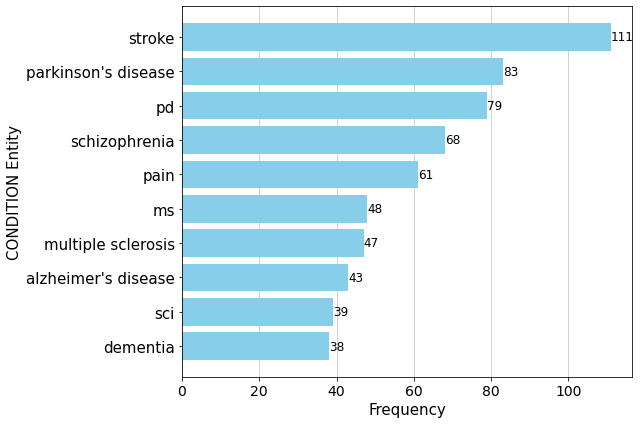

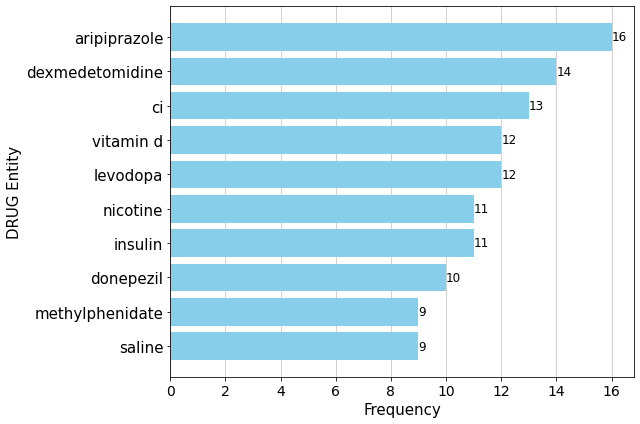

In [20]:
# Get the top 10 CONDITION entities
top10_condition = get_top(df_all, n=10, entity_class="CONDITION")

# Get the top 10 DRUG entities
top10_drug = get_top(df_all, n=10, entity_class="DRUG")

# Create a bar chart for CONDITION entities
plt.figure(figsize=(9, 6))
plt.grid(axis='x', alpha=0.7, zorder=0)
plt.subplots_adjust(left=0.2)  # Adjust the left margin
bars1 = plt.barh(top10_condition['entity_token'], top10_condition['frequency'], color='skyblue', zorder=2)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('CONDITION Entity', fontsize=15)
#plt.title('Top 10 CONDITION Entities', fontsize=12)
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest frequency at the top

# Add numbers inside the bars for CONDITION entities
for bar in bars1:
    width = bar.get_width()
    label_x_pos = width + 1
    label_text = f'{int(width)}'
    plt.text(width, bar.get_y() + bar.get_height() / 2, label_text, va='center', fontsize=12, color='black', zorder=2)
plt.yticks(rotation=0, fontsize=15)
plt.xticks(fontsize=14)
plt.tight_layout()

# Save the first figure as an image
plt.savefig("./annotated_data/corpus_stats/top_10_condition.pdf")

# Show the first plot
plt.show()

# Create a bar chart for DRUG entities
plt.figure(figsize=(9, 6))
plt.grid(axis='x', alpha=0.7, zorder=0)
plt.subplots_adjust(left=0.2)  # Adjust the left margin

bars2 = plt.barh(top10_drug['entity_token'], top10_drug['frequency'], color='skyblue', zorder=2)  # Use hex color code for light orange
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('DRUG Entity', fontsize=15)
#plt.title('Top 10 DRUG Entities', fontsize=12)
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest frequency at the top

# Add numbers inside the bars for DRUG entities
for bar in bars2:
    width = bar.get_width()
    label_x_pos = width + 1
    label_text = f'{int(width)}'
    plt.text(width, bar.get_y() + bar.get_height() / 2, label_text, va='center', fontsize=12, color='black',zorder=2)
    
plt.yticks(fontsize=15)
plt.xticks(fontsize=14)
plt.tight_layout()

# Save the second figure as an image
plt.savefig("./annotated_data/corpus_stats/top_10_drug.pdf")

# Show the second plot
plt.show()

In [44]:
ls

CT Corpus Stats.ipynb
annotated_data/
annotation_agreement_evaluation.py
convert_to_bio_and_generate_dataset_split.py
data_for_prodigy/
drug_names_terminology/
from_prodigy_data_converter.py
generate_corpus_statistics.py
neuro_diseases_terminology/
raw_data_aact_sample/
to_prodigy_data_converter.py


In [45]:
top5_train = get_top(train_entities)
top5_train['source'] = "train"
top5_train

,entity_token,frequency,entity_class,source
0,placebo,163,CONTROL,train
1,stroke,111,CONDITION,train
2,parkinson's disease,83,CONDITION,train
3,pd,79,CONDITION,train
4,schizophrenia,68,CONDITION,train


In [46]:
top5_dev = get_top(dev_entities)
top5_dev['source'] = "dev"
top5_dev

,entity_token,frequency,entity_class,source
0,placebo,28,CONTROL,dev
1,parkinson's disease,14,CONDITION,dev
2,schizophrenia,12,CONDITION,dev
3,acupuncture,11,OTHER,dev
4,tth,10,CONDITION,dev


In [47]:
top5_test = get_top(test_entities)
top5_test['source'] = "test"
top5_test

,entity_token,frequency,entity_class,source
0,pain,23,CONDITION,test
1,vret,15,OTHER,test
2,placebo,14,CONTROL,test
3,dementia,12,CONDITION,test
4,ttm,12,OTHER,test


In [48]:
pd.concat([top5_train, top5_dev, top5_test])

,entity_token,frequency,entity_class,source
0,placebo,163,CONTROL,train
1,stroke,111,CONDITION,train
2,parkinson's disease,83,CONDITION,train
3,pd,79,CONDITION,train
4,schizophrenia,68,CONDITION,train
0,placebo,28,CONTROL,dev
1,parkinson's disease,14,CONDITION,dev
2,schizophrenia,12,CONDITION,dev
3,acupuncture,11,OTHER,dev
4,tth,10,CONDITION,dev


In [49]:
grouped_df_train = train_entities.groupby('entity_class')['frequency'].sum()
grouped_df_train = grouped_df_train.sort_values(ascending=False)
grouped_df_train

entity_class
CONDITION       3159
DRUG            1194
OTHER           1138
CONTROL          374
PHYSICAL         335
BEHAVIOURAL      153
SURGICAL          89
RADIOTHERAPY      24
Name: frequency, dtype: int64

In [50]:
grouped_df_test = test_entities.groupby('entity_class')['frequency'].sum()
grouped_df_test = grouped_df_test.sort_values(ascending=False)
grouped_df_test

entity_class
CONDITION       465
OTHER           154
DRUG            128
PHYSICAL         68
BEHAVIOURAL      48
CONTROL          38
RADIOTHERAPY      1
Name: frequency, dtype: int64

In [51]:
grouped_df_dev = dev_entities.groupby('entity_class')['frequency'].sum()
grouped_df_dev = grouped_df_dev.sort_values(ascending=False)
grouped_df_dev

entity_class
CONDITION       374
DRUG            155
OTHER           144
CONTROL          50
BEHAVIOURAL      21
PHYSICAL         16
SURGICAL          9
RADIOTHERAPY      1
Name: frequency, dtype: int64

# Extracting Abbreviations

In [23]:
def extract_abbreviation_definition_pairs(doc_text):
    pairs = schwartz_hearst.extract_abbreviation_definition_pairs(doc_text=doc_text)
    return pairs

In [219]:
extract_abbreviation_definition_pairs("heihfdo pakrins disse (PD)")

{'PD': 'pakrins disse'}

In [222]:
full_corpus_df = pd.read_csv("corpus/final_annotated_ds_per_ct_annotations.csv")[['nct_id', 'text']]

In [223]:
full_corpus_df['pairs'] = full_corpus_df['text'].apply(extract_abbreviation_definition_pairs)
full_corpus_df.head()

,nct_id,text,pairs
0,NCT00069550,Pathogenesis of Rett Syndrome: Natural History...,{'RTT': 'Rett syndrome'}
1,NCT04956874,The Florida REACH Translation Project | The pr...,{}
2,NCT04118829,Correlation of Serum Level of Perampanel (PER)...,"{'PER': 'Perampanel', 'CSF': 'Cerebrospinal Fl..."
3,NCT03232697,French Language Validation of the Phone Versio...,{'MoCA': 'Montreal Cognitive Assessment'}
4,NCT05462340,PET Imaging Study of α7 and α4β2-nAChR in Schi...,"{'PET': 'Positron Emission Tomography', 'MRI':..."


In [242]:
from collections import Counter
from collections import defaultdict

full_corpus_df['pairs'] = full_corpus_df['text'].apply(extract_abbreviation_definition_pairs)

# Step 1: Extract all pairs from the 'pairs' column into a list of dictionaries
all_pairs_list_of_dicts = full_corpus_df['pairs'].tolist()

# Initialize a defaultdict to store the frequency of each combination
frequency_dict = defaultdict(int)

# Iterate through each dictionary in the list and count the frequency of each combination
for dictionary in all_pairs_list_of_dicts:
    for key, value in dictionary.items():
        combination = f"{key}: {value}"
        frequency_dict[combination] += 1

# Sort the combinations by frequency in descending order
sorted_combinations = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)

# Convert the sorted_combinations list of tuples back to a dictionary
result_dict = dict(sorted_combinations)

# Get only the top 10 combinations
top_10_combinations = dict(sorted_combinations[:10])

# Output the result
print(top_10_combinations)

{"PD: Parkinson's disease": 7, 'SCI: spinal cord injury': 5, 'MS: Multiple Sclerosis': 4, 'MS: multiple sclerosis': 4, 'PK: pharmacokinetics': 3, 'CSF: cerebrospinal fluid': 3, 'PET: positron emission tomography': 3, 'OSA: obstructive sleep apnea': 3, 'CPAP: continuous positive airway pressure': 3, "PD: Parkinson's Disease": 3}


In [267]:
df = pd.read_csv("corpus/aact_neuro_samples_202308031504.csv")
df.shape

(35969, 3)

In [268]:
df.head()

,nct_id,official_title,description
0,NCT05614713,Effect of Sensory Integration Therapy on Balan...,Purpose: to investigate the effect of sensory ...
1,NCT00480844,Comparison of Cognitive Functions of Schizophr...,In this study we intend to compare the effect ...
2,NCT03827057,RECONsolidation of Traumatic Memories to ResOL...,Posttraumatic Stress Disorder (PTSD) is a comm...
3,NCT00361205,Electronic Compliance Monitoring in Parkinson'...,Patients with Parkinson's Disease (PD) depend ...
4,NCT03038269,Transcranial Direct Current Stimulation and Ro...,The purpose of this study is to improve arm fu...


In [269]:
df.drop_duplicates(subset='nct_id', keep='first', inplace=True)
df.shape

(30521, 3)

In [270]:
all_aact_neuro['title_description'] = df['official_title'] + "| " + df['description']
all_aact_neuro['title_description'] = all_aact_neuro['title_description'].astype(str)


In [271]:
all_aact_neuro.dtypes

nct_id               object
official_title       object
description          object
title_description    object
dtype: object

In [272]:
full_corpus_df = all_aact_neuro[["nct_id", "title_description"]]
full_corpus_df.head()

,nct_id,title_description
0,NCT05614713,Effect of Sensory Integration Therapy on Balan...
1,NCT00480844,Comparison of Cognitive Functions of Schizophr...
2,NCT03827057,RECONsolidation of Traumatic Memories to ResOL...
3,NCT00361205,Electronic Compliance Monitoring in Parkinson'...
4,NCT03038269,Transcranial Direct Current Stimulation and Ro...


In [273]:
full_corpus_df['pairs'] = full_corpus_df['title_description'].apply(extract_abbreviation_definition_pairs)


/var/folders/px/wtj901jn7z9f26xgbys4l7jh0000gp/T/ipykernel_9466/359770276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_corpus_df['pairs'] = full_corpus_df['title_description'].apply(extract_abbreviation_definition_pairs)


In [279]:

# Step 1: Extract all pairs from the 'pairs' column into a list of dictionaries
all_pairs_list_of_dicts = full_corpus_df['pairs'].tolist()

# Initialize a defaultdict to store the frequency of each combination
frequency_dict = defaultdict(int)

# Iterate through each dictionary in the list and count the frequency of each combination
for dictionary in all_pairs_list_of_dicts:
    for key, value in dictionary.items():
        value = value.lower()
        combination = f"{key}: {value}"
        frequency_dict[combination] += 1

# Sort the combinations by frequency in descending order
sorted_combinations = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)

# Convert the sorted_combinations list of tuples back to a dictionary
result_dict = dict(sorted_combinations)

In [280]:
# Get only the top 10 combinations
top_n_combinations = dict(sorted_combinations[:30])
top_n_combinations

{"PD: parkinson's disease": 672,
 'MS: multiple sclerosis': 579,
 "AD: alzheimer's disease": 470,
 'OSA: obstructive sleep apnea': 404,
 'SCI: spinal cord injury': 332,
 'tDCS: transcranial direct current stimulation': 322,
 'TBI: traumatic brain injury': 267,
 'MRI: magnetic resonance imaging': 261,
 'CPAP: continuous positive airway pressure': 242,
 'rTMS: repetitive transcranial magnetic stimulation': 209,
 'ALS: amyotrophic lateral sclerosis': 201,
 'CP: cerebral palsy': 172,
 'PK: pharmacokinetics': 169,
 'PET: positron emission tomography': 169,
 'DBS: deep brain stimulation': 164,
 'TMS: transcranial magnetic stimulation': 147,
 'MCI: mild cognitive impairment': 125,
 'IV: intravenous': 120,
 'RCT: randomized controlled trial': 111,
 'CSF: cerebrospinal fluid': 110,
 'CNS: central nervous system': 104,
 'VR: virtual reality': 94,
 'DMD: duchenne muscular dystrophy': 93,
 'CTS: carpal tunnel syndrome': 84,
 'fMRI: functional magnetic resonance imaging': 78,
 'FM: fibromyalgia': 7